# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [ждем контеста] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 12.5 (выше почему-то фек про максимум 11 баллов, с бонусками 12.5 выходит)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [817]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [818]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

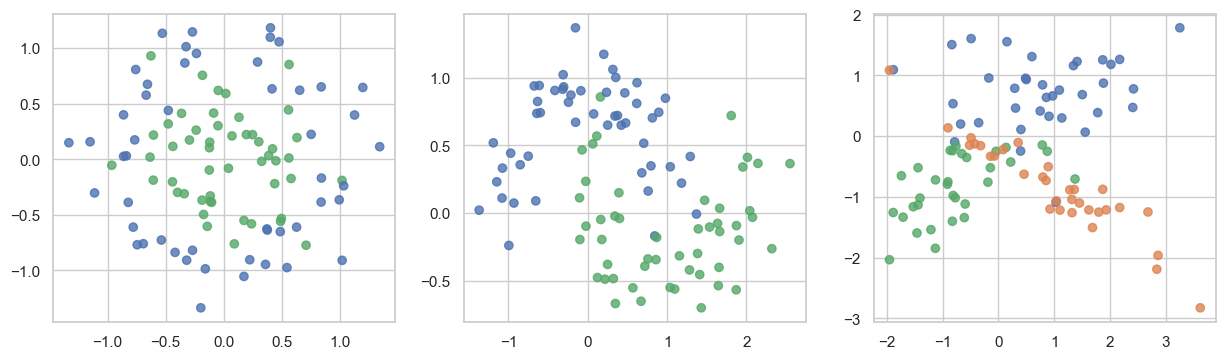

In [819]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [820]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.show()

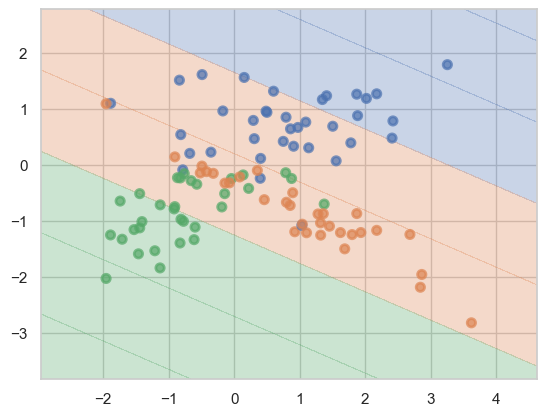

In [821]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [822]:
datasets_train = []
datasets_test = []

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    datasets_train.append((X_train, y_train))
    datasets_test.append((X_test, y_test))

Accuracy: 0.8:


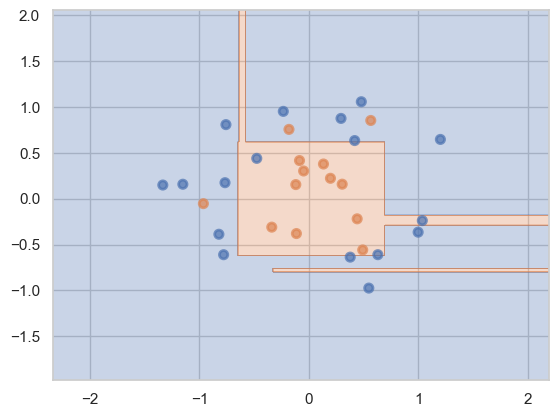

Accuracy: 0.8666666666666667:


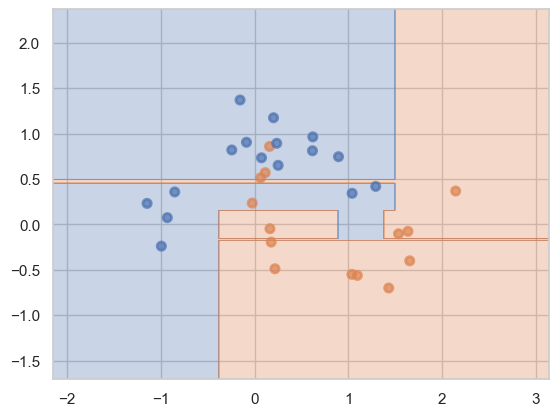

Accuracy: 0.7666666666666667:


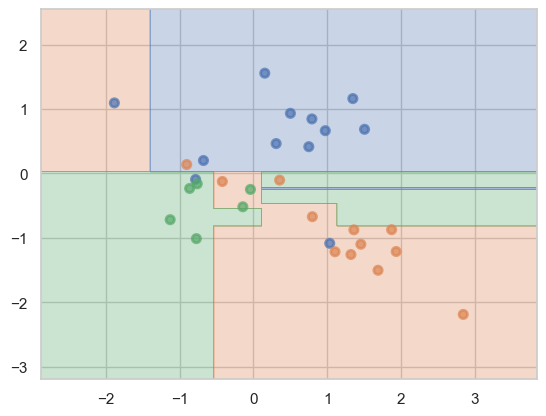

In [823]:
for i in range(3):
    X_train, y_train = datasets_train[i]
    X_test, y_test = datasets_test[i]
    
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    print(f'Accuracy: {(pred == y_test).sum() / y_test.shape[0]}:')
    
    plot_surface(model, X_test, y_test)

__Ответ:__ да, деревья сильно переобучаются, много артефактов, явно вызванных попыткой подогнаться под отдельные наблюдения из обучающей выборки

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [68]:
!pip install plotly==5.24.1

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   -- ------------------------------------- 1.0/19.1 MB 12.5 MB/s eta 0:00:02
   ----------- ---------------------------- 5.2/19.1 MB 18.7 MB/s eta 0:00:01
   --------------------- ------------------ 10.2/19.1 MB 20.5 MB/s eta 0:00:01
   ----------------------------- ---------- 14.2/19.1 MB 19.8 MB/s eta 0:00:01
   -------------------------------------- - 18.4/19.1 MB 19.9 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 19.1 MB/s eta 0:00:00


In [102]:
!pip install dash

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 1.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/7.8 MB 1.9 MB/s eta 0:00:04
   -------- ------------------------------- 1.6/7.8 MB 2.2 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.8 MB 2.5 MB/s eta 0:00:03
   ----------------- ---------------------- 3.4/7.8 MB 2.9 MB/s eta 0:00:02
   ------------------------ --------------- 4.7/7.8 MB 3.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 4.4 MB/s eta 0:00:00


In [16]:
!pip install jupyter-dash

In [824]:
from dash import Dash, dcc, html, Input, Output

In [825]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [826]:
app = Dash(__name__)

app.layout = html.Div(
    style={'background-color': '#f9f9f9'},
    children=[
        dcc.Graph(id='graph-output', style={'flex': '1'}),
        html.P('max_depth:'),
        dcc.Slider(
            id='max_depth', min=1, max=10, step=1, value=10,
            marks={i: str(i) for i in range(1, 11)},
            tooltip={"placement": "bottom", "always_visible": True},
        ),
        html.P('min_samples_leaf:'),
        dcc.Slider(
            id='min_samples_leaf', min=1, max=20 ,step=1, value=1,
            marks={i: str(i) for i in range(1, 21)},
            tooltip={"placement": "bottom", "always_visible": True},
        )
    ]
)

@app.callback(
    Output('graph-output', 'figure'),
    [Input('max_depth', 'value'),
     Input('min_samples_leaf', 'value')]
)
def train_and_display_tree(max_depth, min_samples_leaf):
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

    fig = make_subplots(rows=1, cols=3)
    plot_step = 0.01

    anns = []
    
    for i, (X, y) in enumerate(datasets):
        X_train, y_train = datasets_train[i]
        clf.fit(X_train, y_train)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        train_acc = (clf.predict(X_train) == y_train).sum() / y_train.shape[0]
        test_acc = (clf.predict(X_test) == y_test).sum() / y_test.shape[0]
        anns.append((train_acc, test_acc))
        
        x_range = np.arange(x_min, x_max, plot_step)
        y_range = np.arange(y_min, y_max, plot_step)
        xx, yy = np.meshgrid(x_range, y_range)
                             
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    
        fig.add_trace(
            go.Contour(
                x=x_range, y=y_range, z=Z,
                showscale=False, colorscale='RdBu',
                opacity=0.6, name='Score', hoverinfo='skip'
            ),
            row=1, col=i+1
        )

        fig.add_trace(
            go.Scatter(
                x=X[y==0, 0], y=X[y==0, 1],
                mode='markers', marker=dict(color='darkred', line=dict(width=1)),
                opacity=1, showlegend=False
            ),
            row=1, col=i+1
        )
        fig.add_trace(
            go.Scatter(
                x=X[y==1, 0], y=X[y==1, 1],
                mode='markers', marker=dict(color='darkblue' if i != 2 else 'lightgrey', line=dict(width=1)),
                opacity=1, showlegend=False
            ),
            row=1, col=i+1
        )
        fig.add_trace(
            go.Scatter(
                x=X[y==2, 0], y=X[y==2, 1],
                mode='markers', marker=dict(color='darkblue', line=dict(width=1)),
                opacity=1, showlegend=False
            ),
            row=1, col=i+1
        )

    fig.update_layout(
        annotations=[
            dict(
                text=f'train acc: {ann[0]:.2f};\ttest_acc:{ann[1]:.2f}',
                xref=f'x{i+1}',
                yref='paper',
                x=0.2, 
                y=-0.2,
                showarrow=False,
                font=dict(size=12, color="gray")
            ) for i, ann in enumerate(anns)
        ]
    )
    
    fig.update_layout(
        width=950,
        height=450,
        title='Деревья решений на трёх сгенерированных датасетах'
    )
    
    return fig

app.run_server(debug=True)

__Ответ:__ при большой разрешенной глубине и маленьком числе наблюдений в листах заметно сильное переобучение - много "коридоров" под выбросы и в целом невнятная структура поверхности. Если уменьшать глубину или увеличивать число наблюдений в листах, можно добиться более аккуратных поверхностей, но они будут слишком простыми, чтобы уловить настоящие закономерности, по которым были сгенерированы данные, и разделяют на классы они слишком грубо. Видимо, самих данных тоже слишком мало, чтобы можно было подобрать хорошие параметры.

Можно заметить, что на разных датасетах модель (по крайней мере на этом разбиении на train и test) переобучается с разной силой.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py
https://contest.yandex.ru/contest/72492/run-report/129329931/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [827]:
from hw5code import find_best_split

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0, 0.5, 'Значение индекса джини')

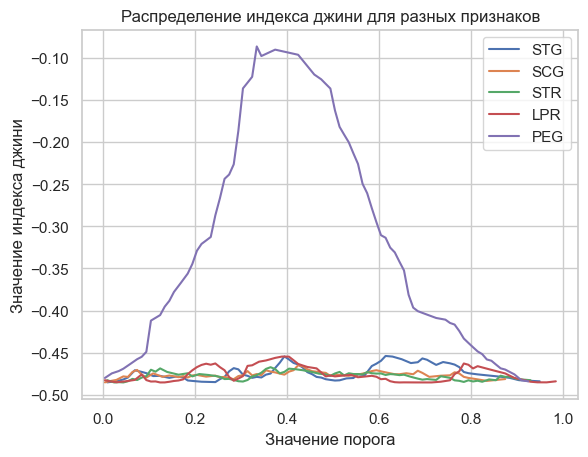

In [837]:
students = pd.read_csv('students.csv')
features = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

results = []

for f in features:
    results.append(find_best_split(students[f].to_numpy(), students['UNS'].to_numpy()))

for f, res in zip(features, results):
    sns.lineplot(x=res[0], y=res[1], label=f)

plt.title('Распределение индекса джини для разных признаков')
plt.xlabel('Значение порога')
plt.ylabel('Значение индекса джини')

Text(0.5, 0.98, 'Распределение таргета для разных признаков и лучшие пороги для них')

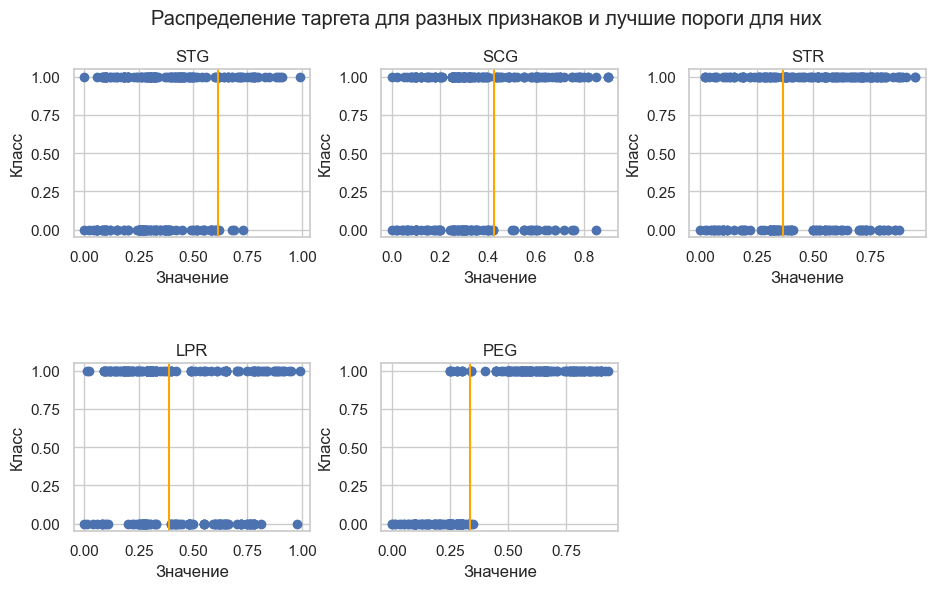

In [838]:
fig = plt.figure(figsize=(11, 6))
gs = GridSpec(2, 3, figure=fig)  # 2 строки, 3 столбца
gs.update(hspace=0.75, wspace=0.3)

for i, f in enumerate(features[0:3]):
    ax = fig.add_subplot(gs[0, i])
    ax.scatter(students[f], students['UNS'])
    ax.set_title(f)
    ax.set_xlabel('Значение')
    ax.set_ylabel('Класс')
    ax.axvline(x=results[i][2], color='orange')

for i, f in enumerate(features[3:]):
    ax = fig.add_subplot(gs[1, i])
    ax.scatter(students[f], students['UNS'])
    ax.set_title(f)
    ax.set_xlabel('Значение')
    ax.set_ylabel('Класс')
    ax.axvline(x=results[i+3][2], color='orange')

fig.add_subplot(gs[1, 2]).axis('off')

plt.suptitle('Распределение таргета для разных признаков и лучшие пороги для них')

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** деление на поддеревья, конечно, стоит проводить по признаку `PEG`. Из индексов джини мы видим, что при наилучшем пороге его значение достигает практически 0 (что означает, что в обоих полученных поддеревьях значения таргета - практически константны). Это согласуется и с диаграммами рассеивания, на которых для признака `PEG` можно увидеть почти идеальное соответствие между классом и тем, превышает ли значение признака порог.

Кривая для хорошего признака выпукла вверх и имеет выраженный максимум. Это означает, что объекты хорошо отсортированы с точки зрения таргета, и граница между в-основном-положительными и в-основном-отрицательными объектами проходит как раз в районе точки максимума. Чем дальше от неё мы отходим, тем больше impurity создаём как минимум в одном из поддеревьев. У плохих же признаков кривая напоминает случайный шум без выраженных областей с более высокими или более низкими значениями. У объектов, отсортированных по этому признаку, таргеты не упорядочены, поэтому где бы мы не поставили порог, в обоих поддереевьях будет одинаково много impurity.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.
https://contest.yandex.ru/contest/72492/run-report/129688267/

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [839]:
from hw5code import DecisionTree
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('agaricus-lepiota.data', header=None)

X = df.loc[:, 1:].apply(LabelEncoder().fit_transform)
y = np.where(df[0] == 'p', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ["categorical" for i in range(X.columns.shape[0])]
model = DecisionTree(feature_types=feature_types)
model.fit(X_train.to_numpy(), y_train)

pr = model.predict(X_test.to_numpy())

In [840]:
print((pr == y_test).sum() / y_test.shape[0])

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print((clf.predict(X_test) == y_test).sum() / y_test.shape[0])

1.0
1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

Text(0, 0.5, 'accuracy')

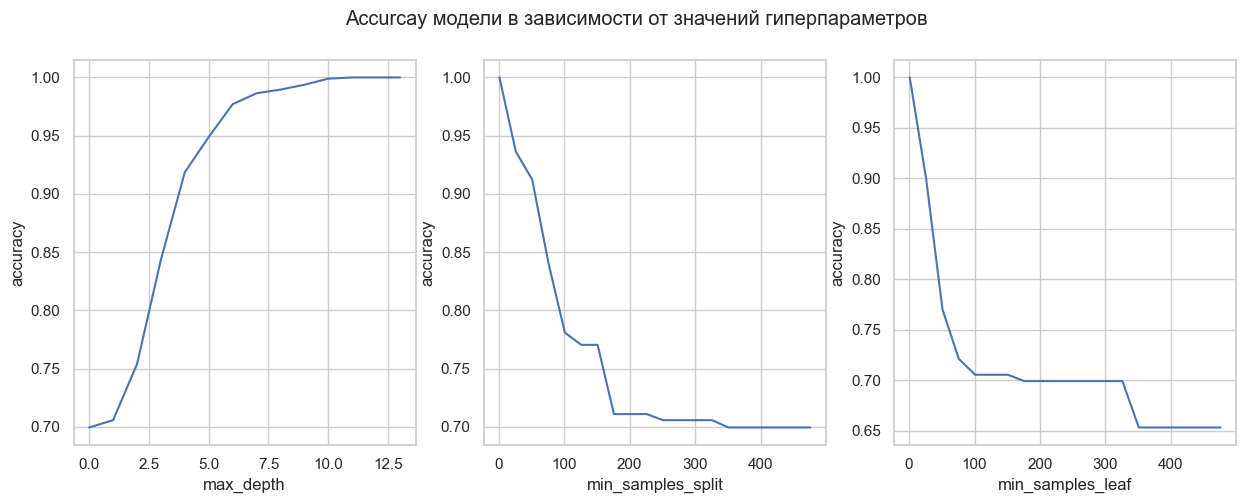

In [841]:
ttt = pd.read_csv("tic-tac-toe-endgame.csv")

X = ttt.drop(columns=['V10']).apply(LabelEncoder().fit_transform).to_numpy()
y = np.where(ttt['V10'] == 'positive', 1, 0)
feature_types = ['categorical' for i in range(X.shape[1])]

accuracy_by_depth = []
accuracy_by_split = []
accuracy_by_leaf = []

for max_depth in range(1, 15):
    model = DecisionTree(feature_types=feature_types, max_depth=max_depth)
    model.fit(X, y)
    accuracy_by_depth.append((model.predict(X) == y).sum() / y.shape[0])

for min_sample_split in range(1, 500, 25):
    model = DecisionTree(feature_types=feature_types, min_samples_split=min_sample_split)
    model.fit(X, y)
    accuracy_by_split.append((model.predict(X) == y).sum() / y.shape[0])

for min_sample_leaf in range(1, 500, 25):
    model = DecisionTree(feature_types=feature_types, min_samples_leaf=min_sample_leaf)
    model.fit(X, y)
    accuracy_by_leaf.append((model.predict(X) == y).sum() / y.shape[0])

x_values = [i for i in range(1, 500, 25)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Accurcay модели в зависимости от значений гиперпараметров')

axes[0].plot(accuracy_by_depth)
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('accuracy')

axes[1].plot(x_values, accuracy_by_split)
axes[1].set_xlabel('min_samples_split')
axes[1].set_ylabel('accuracy')

axes[2].plot(x_values, accuracy_by_leaf)
axes[2].set_xlabel('min_samples_leaf')
axes[2].set_ylabel('accuracy')

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [833]:
from hw5code import LinearRegressionTree, best_regression_split
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(data=np.c_[housing['data'], housing['target']], columns=housing['feature_names'] + ['target'])
X = df.drop(columns=['target']).to_numpy()
y = df['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

feature_types = ['real' for _ in range(X.shape[1])]

model = LinearRegressionTree(feature_types=feature_types, max_depth=3, min_samples_leaf=0.05)
model.fit(X_train, y_train)
custom_pred = model.predict(X_test)

In [834]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

sk_model = DecisionTreeRegressor(max_depth=9)
sk_model.fit(X_train, y_train)
sk_pred = sk_model.predict(X_test)

custom_mse = mean_squared_error(custom_pred, y_test)
sk_mse = mean_squared_error(sk_pred, y_test)

print(f'MSE нашего дерева: {custom_mse}')
print(f'MSE DecisionTreeRegressor дерева: {sk_mse}')

MSE нашего дерева: 0.4091947065907585
MSE DecisionTreeRegressor дерева: 0.4190463791533926


Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

MSE нашего дерева: 0.011778664222208253
MSE DecisionTreeRegressor: 0.019657289143603946


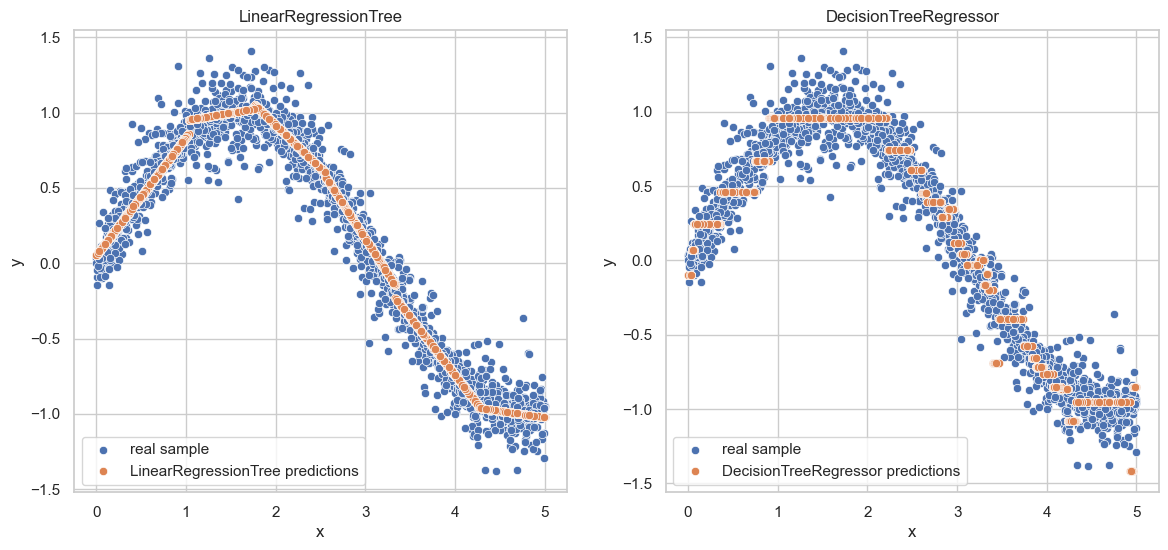

In [835]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

custom_tree = LinearRegressionTree(feature_types=['real'], max_depth=10, min_samples_leaf=20)
custom_tree.fit(x_train, y_train)
custom_pred = custom_tree.predict(x_test)

sk_tree = DecisionTreeRegressor(max_depth=5)
sk_tree.fit(x_train, y_train)
sk_pred = sk_tree.predict(x_test)

print(f'MSE нашего дерева: {mean_squared_error(custom_pred, y_test)}')
print(f'MSE DecisionTreeRegressor: {mean_squared_error(sk_pred, y_test)}')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=x_test.reshape(1, -1)[0], y=y_test, label='real sample', ax=axes[0])
sns.scatterplot(x=x_test.reshape(1, -1)[0], y=custom_pred, label='LinearRegressionTree predictions', ax=axes[0])
sns.scatterplot(x=x_test.reshape(1, -1)[0], y=y_test, label='real sample', ax=axes[1])
sns.scatterplot(x=x_test.reshape(1, -1)[0], y=sk_pred, label='DecisionTreeRegressor predictions', ax=axes[1])

axes[0].set_xlabel('x')
axes[1].set_xlabel('x')
axes[0].set_ylabel('y')
axes[1].set_ylabel('y')
axes[0].set_title('LinearRegressionTree')
axes[1].set_title('DecisionTreeRegressor')

plt.legend()
plt.show()

**Ответ:** главное достоинство - можно хорошо приблизить более или менее любую адекватную непрерывную функцию, и в целом позволяет потенциально добиться более высокой точности, чем вариант с константными предсказаниями в листьях. Также реализация подразумевает, что при выборе лучшего разбиения мы строим регрессии для поддеревьев по всем фичам, а не только по той, по которой происходит разбиение - это даёт ещё более высокую точность, причём не в смысле более эффективной подгонки под трейн, а наоборот, в смысле выхыватывания реальных закономерностей в совместном распределении фич.

Но этому сопутствует много усложняющих жизнь обстоятельств. В их числе: 
1) Потенциально более серьёзные проблемы с переобучением (стоит поставить слишком большое `max_depth` и не озаботиться `min_samples_leaf` или `min_samples_split` - будем получать на тестовых данных хаотичные торчащие вертикальные линии вместо "гладкого" рельефа настоящей функции).
2)  Долгое обучение. Так как каждый раз необходимо строить много регрессий (по всем фичам) для выбора предиката, на данных с очень большим количество наблюдений и/или большим количеством фич будет затруднительно обучить глубокое дерево - понадобится слишком много времени.

Также важно отметить особенности реализации:
1)  Отсутствует специальный учёт для категориальных признаков. Мы исходим из того, что пользователь либо применил OHE, либо номера категорий уже предоставлены в некотором осмысленном порядке (аналогично библиотечные классы, реализующие обычные линейные регрессии, ожидают, что данные закодированы нормально и класс не должен придумывать оптимальный способ перетасовывать натуральные числа, кодирующие категории). Единственное, на что влияет передача `categorical` в `feature_types`, это количество порогов, которые будут рассмотрены - для категориальных признаков будет перебираться количество порогов, соответствующее количеству категорий, а не произвольно заданное количество квантилей, которое может либо создавать слишком много порогов, либо слишком мало.
2)  Количество квантилей, перебираемое при выборе лучшего порога, можно передать в качестве параметра, что потенциально может повышать точность, либо наоборот существенно сокращать время обучения на больших данных.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

тупой кот злится на горячую колбасу за то что она горячая: https://youtu.be/bfpUiWL0Eo8?si=s9qyVRW_r7GuwJ91 \
честно говоря разозлила тупость кота